In [1]:
import os, shutil
import time
from pathlib import Path

In [2]:
def make_dir(path_to_dir):
    if not os.path.exists(path_to_dir):
        os.mkdir(path_to_dir)

In [3]:
cwd = os.getcwd()
cwd

'F:\\notebooks'

In [4]:
original_dataset_dir = './data/cats_and_dogs/train'
base_dir = cwd + './data/cats_and_dogs_small'
make_dir(base_dir)

In [5]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

make_dir(train_dir)
make_dir(validation_dir)
make_dir(test_dir)

In [6]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

make_dir(train_cats_dir)
make_dir(train_dogs_dir)

In [7]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

make_dir(validation_cats_dir)
make_dir(validation_dogs_dir)

In [8]:
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

make_dir(test_cats_dir)
make_dir(test_dogs_dir)

In [9]:
fnames = [f'cat.{i}.jpg' for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
fnames = [f'cat.{i}.jpg' for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [11]:
fnames = [f'cat.{i}.jpg' for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [12]:
fnames = [f'dog.{i}.jpg' for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [13]:
fnames = [f'dog.{i}.jpg' for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [14]:
fnames = [f'dog.{i}.jpg' for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [15]:
print('# of images | train | cats', len(os.listdir(train_cats_dir)))
print('# of images | test | cats', len(os.listdir(test_cats_dir)))
print('# of images | validation | cats', len(os.listdir(validation_cats_dir)))

# of images | train | cats 1000
# of images | test | cats 500
# of images | validation | cats 500


In [16]:
print('# of images | train | dogs', len(os.listdir(train_dogs_dir)))
print('# of images | test | dogs', len(os.listdir(test_dogs_dir)))
print('# of images | validation | dogs', len(os.listdir(validation_dogs_dir)))

# of images | train | dogs 1000
# of images | test | dogs 500
# of images | validation | dogs 500


In [17]:
import torch
import torchvision
from torchvision import transforms, datasets

In [18]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [19]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Resize((150,150))])

batch_size = 20

train_data = datasets.ImageFolder(root=train_dir, transform=transform)
trainloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)

validation_data = datasets.ImageFolder(root=validation_dir, transform=transform)
validationloader = torch.utils.data.DataLoader(validation_data, batch_size=batch_size, shuffle=False, num_workers=2)

test_data = datasets.ImageFolder(root=test_dir, transform=transform)
testloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('cat', 'dog')

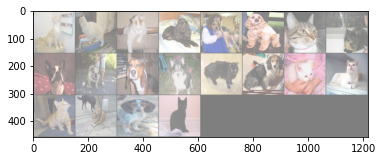

  cat   cat   cat   dog   dog   dog   cat   cat   dog   dog   dog   dog   cat   dog   cat   cat   cat   dog   dog   cat


In [20]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()



# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [21]:
images.shape

torch.Size([20, 3, 150, 150])

In [22]:
torch.max(images), torch.min(images)

(tensor(1.), tensor(0.))

In [23]:
import torch.nn as nn
import torch.nn.functional as F

In [24]:
m = nn.MaxPool2d(2, 2)
input = torch.randn(1, 1, 15, 15)
output = m(input)
output.shape

torch.Size([1, 1, 7, 7])

In [25]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # input (3, 150, 150)
        self.conv1 = nn.Conv2d(3, 32, 3) # (32, 148, 148)
        self.pool1 = nn.MaxPool2d(2, 2) # (32, 74, 74)
        self.conv2 = nn.Conv2d(32, 64, 3) # (64, 72, 72)
        self.pool2 = nn.MaxPool2d(2, 2) # (63, 36, 36)
        self.conv3 = nn.Conv2d(64, 128, 3) # (128, 34, 34)
        self.pool3 = nn.MaxPool2d(2, 2) # (128, 17, 17)
        self.conv4 = nn.Conv2d(128, 128, 3) # (128, 15, 15)
        self.pool4 = nn.MaxPool2d(2, 2)  # (128, 7, 7)
        self.dense1 = nn.Linear(128*7*7, 512)
        self.dense2 = nn.Linear(512, 1)
        
        
    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = self.pool4(F.relu(self.conv4(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.dense1(x))
        x = F.sigmoid(self.dense2(x))
        return x

In [26]:
# class Net(nn.Module):
#     def __init__(self):
#         super().__init__()
#         # input (3, 150, 150)
#         # (32, 148, 148)
#         # (32, 74, 74)
#         self.conv1 = nn.Sequential(nn.Conv2d(3, 32, 3),
#                                    nn.ReLU(),
#                                    nn.MaxPool2d(2, 2))
#         # (64, 72, 72)
#         # (63, 36, 36)
#         self.conv2 = nn.Sequential(nn.Conv2d(32, 64, 3),
#                                    nn.ReLU(),
#                                    nn.MaxPool2d(2, 2))
#         # (128, 34, 34)
#         # (128, 17, 17)
#         self.conv3 = nn.Sequential(nn.Conv2d(64, 128, 3),
#                                    nn.ReLU(),
#                                    nn.MaxPool2d(2, 2))
#         self.conv4 = nn.Sequential(nn.Conv2d(128, 128, 3), nn.MaxPool2d(2, 2))
#         # (128, 15, 15)
#         # (128, 7, 7)
#         self.dense1 = nn.Sequential(nn.Linear(128 * 7 * 7, 512),
#                                     nn.ReLU())
#         self.dense2 = nn.Linear(512, 1)
        
#     def forward(self, x):
#         x = self.conv1(x)
#         x = self.conv2(x)
#         x = self.conv3(x)
#         x = self.conv4(x)
#         x = torch.flatten(x, 1)
#         x = self.dense1(x)
#         x = self.dense2(x)
#         return x

# model = Net().to(device)

In [ ]:
# def train(model, optimizer, loss_fn, train_loader, val_loader, epochs=20, device="cpu"):
#     for epoch in range(1, epochs+1):
#         training_loss = 0.0
#         valid_loss = 0.0
#         model.train()
#         for batch in train_loader:
#             optimizer.zero_grad()
#             inputs, targets = batch
#             inputs = inputs.to(device)
#             targets = targets.to(device).float().unsqueeze(-1)
#             output = model(inputs)
# #             loss = loss_fn(output, targets)
#             loss = loss_fn(output, targets)
#             loss.backward()
#             optimizer.step()
#             training_loss += loss.data.item() * inputs.size(0)
#         training_loss /= len(train_loader.dataset)
        
#         model.eval()
#         num_correct = 0 
#         num_examples = 0
#         for batch in val_loader:
#             inputs, targets = batch
#             inputs = inputs.to(device)
#             targets = targets.to(device).float().unsqueeze(-1)
#             output = model(inputs)
# #             loss = loss_fn(output, targets)
#             loss = loss_fn(output, targets)
#             valid_loss += loss.data.item() * inputs.size(0)
#             correct = torch.eq(torch.max(F.softmax(output, dim=1), dim=1)[1],
#                                targets)
#             num_correct += torch.sum(correct).item()
#             num_examples += correct.shape[0]
#         valid_loss /= len(val_loader.dataset)

#         print('Epoch: {}, Training Loss: {:.2f}, Validation Loss: {:.2f}, accuracy = {:.2f}'.format(epoch, training_loss, valid_loss, num_correct / num_examples))

In [ ]:
# train(model, optimizer, criterion, trainloader, validationloader, epochs=10, device=device)

In [35]:
def train_epoch(model, optimizer, criterion, train_loader, validation_loader, epoch, device=device):
    t_start = time.time()

    model.train()
    train_loss = 0.0
    train_acc = 0
    for batch in train_loader:
        train_x, train_y = batch
        train_x = train_x.to(device)
        train_y = train_y.to(device).float().view(1,-1).t()
        output = model(train_x)
        loss = criterion(output, train_y)
        train_loss += loss.data.item() * train_x.size(0)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        pred = output.cpu()
        one_label = pred >= 0.5
        pred[one_label] = 1
        pred[torch.logical_not(one_label)] = 0
        train_acc += pred.eq(train_y.cpu()).int().sum()

    train_loss /= len(train_loader.dataset)
    train_acc = train_acc / len(train_loader.dataset)
        
    model.eval()
    valid_loss = 0.0
    valid_acc = 0
    for batch in validation_loader:
        valid_x, valid_y = batch
        valid_x = valid_x.to(device)
        valid_y = valid_y.to(device).float().view(1,-1).t()
        output = model(valid_x)
        loss = criterion(output, valid_y)
        valid_loss += loss.data.item() * valid_x.size(0)

        pred = output.cpu()
        one_label = pred >= 0.5
        pred[one_label] = 1
        pred[torch.logical_not(one_label)] = 0
        valid_acc += pred.eq(train_y.cpu()).int().sum()
    
    valid_loss /= len(validation_loader.dataset)
    valid_acc = valid_acc / len(validation_loader.dataset)
    
    return time.time() - t_start, train_loss, train_acc, valid_loss, valid_acc

def train(model, optimizer, criterion, train_loader, validation_loader, epochs=20, device=device):
    lst_train_loss = []
    lst_train_acc = []
    lst_valid_loss = []
    lst_valid_acc = []
    for epoch in range(epochs):
        t_epoch, train_loss, train_acc, valid_loss, valid_acc = train_epoch(model, optimizer, criterion, train_loader, validation_loader, epoch, device)
        lst_train_loss.append(train_loss)
        lst_train_acc.append(train_acc)
        lst_valid_loss.append(valid_loss)
        lst_valid_acc.append(valid_acc)
        
        print(f'[Epoch: {epoch + 1}/{epochs}] -> Training Loss: {train_loss:.4f}, Training Acc: {train_acc:.4f},  Validation Loss: {valid_loss:.4f}, Validation Acc: {valid_acc:.4f}, {t_epoch:.3f}sec')
    return {'train_acc': lst_train_acc, 'train_loss': lst_train_loss, 'valid_acc': lst_valid_acc, 'valid_loss': lst_valid_loss}
        

In [36]:
from torchsummary import summary

model = Net().to(device)
model.cuda()
summary(model, input_size=(3, 150, 150))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 148, 148]             896
         MaxPool2d-2           [-1, 32, 74, 74]               0
            Conv2d-3           [-1, 64, 72, 72]          18,496
         MaxPool2d-4           [-1, 64, 36, 36]               0
            Conv2d-5          [-1, 128, 34, 34]          73,856
         MaxPool2d-6          [-1, 128, 17, 17]               0
            Conv2d-7          [-1, 128, 15, 15]         147,584
         MaxPool2d-8            [-1, 128, 7, 7]               0
            Linear-9                  [-1, 512]       3,211,776
           Linear-10                    [-1, 1]             513
Total params: 3,453,121
Trainable params: 3,453,121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.26
Forward/backward pass size (MB): 11.53
Params size (MB): 13.17
Estim

In [37]:
criterion = nn.BCELoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=1e-4)

history = train(model, optimizer, criterion, trainloader, validationloader, epochs=50, device=device)

[Epoch: 1/50] -> Training Loss: 0.6951, Training Acc: 0.5070,  Validation Loss: 0.6878, Validation Acc: 0.6360, 10.089sec
[Epoch: 2/50] -> Training Loss: 0.6849, Training Acc: 0.5475,  Validation Loss: 0.6689, Validation Acc: 0.5280, 8.124sec
[Epoch: 3/50] -> Training Loss: 0.6588, Training Acc: 0.6260,  Validation Loss: 0.6572, Validation Acc: 0.5650, 8.057sec
[Epoch: 4/50] -> Training Loss: 0.6272, Training Acc: 0.6610,  Validation Loss: 0.6234, Validation Acc: 0.5020, 7.811sec
[Epoch: 5/50] -> Training Loss: 0.6106, Training Acc: 0.6760,  Validation Loss: 0.6387, Validation Acc: 0.5340, 7.821sec
[Epoch: 6/50] -> Training Loss: 0.5927, Training Acc: 0.6985,  Validation Loss: 0.6178, Validation Acc: 0.5160, 7.812sec
[Epoch: 7/50] -> Training Loss: 0.5772, Training Acc: 0.7085,  Validation Loss: 0.6086, Validation Acc: 0.5180, 7.698sec
[Epoch: 8/50] -> Training Loss: 0.5574, Training Acc: 0.7205,  Validation Loss: 0.5838, Validation Acc: 0.4860, 7.794sec
[Epoch: 9/50] -> Training Loss:

In [40]:
history.keys()

dict_keys(['train_acc', 'train_loss', 'valid_acc', 'valid_loss'])

In [41]:
import matplotlib.pyplot as plt

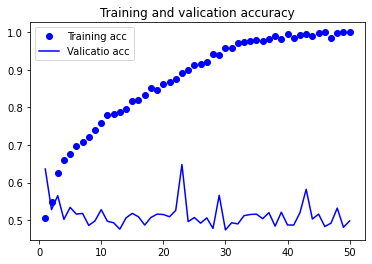

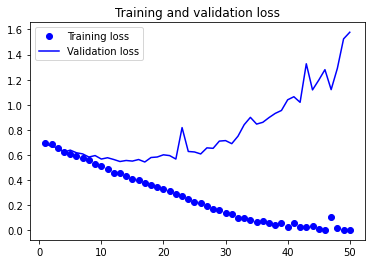

In [44]:
train_acc = history['train_acc']
val_acc = history['valid_acc']
train_loss = history['train_loss']
val_loss = history['valid_loss']

epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Valicatio acc')
plt.title('Training and valication accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()